<a href="https://colab.research.google.com/github/harshjoshi297/ML-Models-Practice/blob/main/Recomendation_system_Assignment16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/anime.csv')

In [ ]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
df.shape

(12294, 7)

In [ ]:
df.isnull().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


Since we have almost 12000 rows, we can drop the rows which have genre missing.
Genre will be our most imp column.

In [ ]:
df = df.dropna(subset=['genre'])

In [ ]:
df.isnull().sum()

,0
anime_id,0
name,0
genre,0
type,22
episodes,0
rating,215
members,0


/tmp/ipython-input-1694190092.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='viridis')


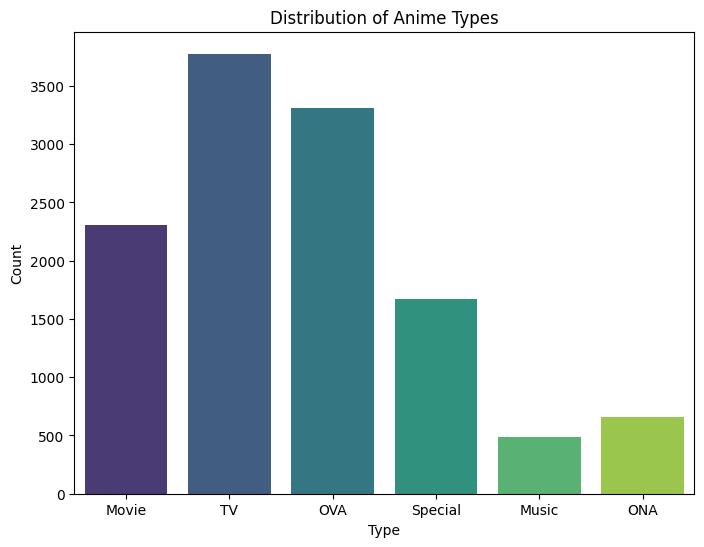

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='type', palette='viridis')
plt.title('Distribution of Anime Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

We can impute type column with the mode to get rid of missing values.

In [ ]:
mode_type = df['type'].mode()[0]
df['type'].fillna(mode_type, inplace=True)
print(f"Missing values in 'type' column after imputation: {df['type'].isnull().sum()}")

Missing values in 'type' column after imputation: 0


/tmp/ipython-input-1368284410.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['type'].fillna(mode_type, inplace=True)


In [ ]:
df.describe()

,anime_id,rating,members
count,12232.000000,12017.000000,1.223200e+04
mean,13970.041530,6.478264,1.815922e+04
std,11415.656332,1.023857,5.494528e+04
min,1.000000,1.670000,5.000000e+00
25%,3465.750000,5.890000,2.297500e+02
50%,10199.500000,6.570000,1.572000e+03
75%,24544.500000,7.180000,9.494000e+03
max,34527.000000,10.000000,1.013917e+06


Similarly, we can impute missing values of rating column with the median/mean.

In [ ]:
median_rating = df['rating'].median()
df['rating'].fillna(median_rating, inplace=True)
print(f"Missing values in 'rating' column after imputation: {df['rating'].isnull().sum()}")

Missing values in 'rating' column after imputation: 0


/tmp/ipython-input-1217788060.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(median_rating, inplace=True)


In [ ]:
df.isna().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


All missing values have been imputed.


In [ ]:
df.duplicated().sum()

np.int64(0)

# Model Building

The most important column is the genre col.
Our first step would be to convert all text to lowercase, then split by commas(,) and add them to a list.

In [ ]:
df['genre_list'] = (
    df['genre']
    .str.lower()
    .str.split(',')
    .apply(lambda genres: [g.strip() for g in genres])
)


The above code converts all text from the genre col to lowercase and splits the entries of the cols based on commas.
After getting individual genres, it adds the genres to a list and makes a new col named genre_list.

In [ ]:
df.head()

,anime_id,name,genre,type,episodes,rating,members,genre_list
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,"[drama, romance, school, supernatural]"
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,"[action, adventure, drama, fantasy, magic, mil..."
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,"[action, comedy, historical, parody, samurai, ..."
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,"[sci-fi, thriller]"
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,"[action, comedy, historical, parody, samurai, ..."


In [ ]:
all_genres = sorted(
    set(genre for genres in df['genre_list'] for genre in genres)
)


This piece of code extracts all differnt genres and stores them in a list all_genres.

In [ ]:
all_genres

['action',
 'adventure',
 'cars',
 'comedy',
 'dementia',
 'demons',
 'drama',
 'ecchi',
 'fantasy',
 'game',
 'harem',
 'hentai',
 'historical',
 'horror',
 'josei',
 'kids',
 'magic',
 'martial arts',
 'mecha',
 'military',
 'music',
 'mystery',
 'parody',
 'police',
 'psychological',
 'romance',
 'samurai',
 'school',
 'sci-fi',
 'seinen',
 'shoujo',
 'shoujo ai',
 'shounen',
 'shounen ai',
 'slice of life',
 'space',
 'sports',
 'super power',
 'supernatural',
 'thriller',
 'vampire',
 'yaoi',
 'yuri']

In [ ]:
for genre in all_genres:
    df[f'genre_{genre}'] = df['genre_list'].apply(
        lambda x: 1 if genre in x else 0
    )


The above piece of code performs multihot encoding for all genres of a single entry.

In [ ]:
df.head()

,anime_id,name,genre,type,episodes,rating,members,genre_list,genre_action,genre_adventure,...,genre_shounen ai,genre_slice of life,genre_space,genre_sports,genre_super power,genre_supernatural,genre_thriller,genre_vampire,genre_yaoi,genre_yuri
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,"[drama, romance, school, supernatural]",0,0,...,0,0,0,0,0,1,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,"[action, adventure, drama, fantasy, magic, mil...",1,1,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,"[action, comedy, historical, parody, samurai, ...",1,0,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,"[sci-fi, thriller]",0,0,...,0,0,0,0,0,0,1,0,0,0
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,"[action, comedy, historical, parody, samurai, ...",1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.drop(columns=['genre', 'genre_list'], inplace=True)


In [ ]:
df.head()

,anime_id,name,type,episodes,rating,members,genre_action,genre_adventure,genre_cars,genre_comedy,...,genre_shounen ai,genre_slice of life,genre_space,genre_sports,genre_super power,genre_supernatural,genre_thriller,genre_vampire,genre_yaoi,genre_yuri
0,32281,Kimi no Na wa.,Movie,1,9.37,200630,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,9.26,793665,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,TV,51,9.25,114262,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,TV,24,9.17,673572,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,9969,Gintama&#039;,TV,51,9.16,151266,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
type_dummies = pd.get_dummies(df['type'], prefix='type')
df = pd.concat([df, type_dummies], axis=1)

df.drop(columns=['type'], inplace=True)


This piece of code performs OHE on the type column.

In [ ]:
df.head()

,anime_id,name,episodes,rating,members,genre_action,genre_adventure,genre_cars,genre_comedy,genre_dementia,...,genre_thriller,genre_vampire,genre_yaoi,genre_yuri,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,32281,Kimi no Na wa.,1,9.37,200630,0,0,0,0,0,...,0,0,0,0,True,False,False,False,False,False
1,5114,Fullmetal Alchemist: Brotherhood,64,9.26,793665,1,1,0,0,0,...,0,0,0,0,False,False,False,False,False,True
2,28977,Gintama°,51,9.25,114262,1,0,0,1,0,...,0,0,0,0,False,False,False,False,False,True
3,9253,Steins;Gate,24,9.17,673572,0,0,0,0,0,...,1,0,0,0,False,False,False,False,False,True
4,9969,Gintama&#039;,51,9.16,151266,1,0,0,1,0,...,0,0,0,0,False,False,False,False,False,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12232 entries, 0 to 12293
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   anime_id             12232 non-null  int64  
 1   name                 12232 non-null  object 
 2   episodes             12232 non-null  float64
 3   rating               12232 non-null  float64
 4   members              12232 non-null  int64  
 5   genre_action         12232 non-null  int64  
 6   genre_adventure      12232 non-null  int64  
 7   genre_cars           12232 non-null  int64  
 8   genre_comedy         12232 non-null  int64  
 9   genre_dementia       12232 non-null  int64  
 10  genre_demons         12232 non-null  int64  
 11  genre_drama          12232 non-null  int64  
 12  genre_ecchi          12232 non-null  int64  
 13  genre_fantasy        12232 non-null  int64  
 14  genre_game           12232 non-null  int64  
 15  genre_harem          12232 non-null  int6

In [ ]:
df['episodes'] = df['episodes'].replace('Unknown', np.nan)
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce')
df['episodes'].fillna(df['episodes'].median(), inplace=True)


/tmp/ipython-input-829133195.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['episodes'].fillna(df['episodes'].median(), inplace=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = ['episodes', 'rating', 'members']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


We also need to scale the other numeric cols, we use StandardScaler to do so.

In [ ]:
df.head()

,anime_id,name,episodes,rating,members,genre_action,genre_adventure,genre_cars,genre_comedy,genre_dementia,...,genre_thriller,genre_vampire,genre_yaoi,genre_yuri,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,32281,Kimi no Na wa.,-0.240457,2.847838,3.321090,0,0,0,0,0,...,0,0,0,0,True,False,False,False,False,False
1,5114,Fullmetal Alchemist: Brotherhood,1.118684,2.739448,14.114725,1,1,0,0,0,...,0,0,0,0,False,False,False,False,False,True
2,28977,Gintama°,0.838226,2.729594,1.749135,1,0,0,1,0,...,0,0,0,0,False,False,False,False,False,True
3,9253,Steins;Gate,0.255738,2.650765,11.928952,0,0,0,0,0,...,1,0,0,0,False,False,False,False,False,True
4,9969,Gintama&#039;,0.838226,2.640911,2.422633,1,0,0,1,0,...,0,0,0,0,False,False,False,False,False,True


In [ ]:
feature_cols = (
    df.filter(like='genre_').columns.tolist() +
    df.filter(like='type_').columns.tolist() +
    ['episodes', 'rating', 'members']
)

X = df[feature_cols]


This code is used to create a feature matrix for the machine learning model.

In [ ]:
X

,genre_action,genre_adventure,genre_cars,genre_comedy,genre_dementia,genre_demons,genre_drama,genre_ecchi,genre_fantasy,genre_game,...,genre_yuri,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,episodes,rating,members
0,0,0,0,0,0,0,1,0,0,0,...,0,True,False,False,False,False,False,-0.240457,2.847838,3.321090
1,1,1,0,0,0,0,1,0,1,0,...,0,False,False,False,False,False,True,1.118684,2.739448,14.114725
2,1,0,0,1,0,0,0,0,0,0,...,0,False,False,False,False,False,True,0.838226,2.729594,1.749135
3,0,0,0,0,0,0,0,0,0,0,...,0,False,False,False,False,False,True,0.255738,2.650765,11.928952
4,1,0,0,1,0,0,0,0,0,0,...,0,False,False,False,False,False,True,0.838226,2.640911,2.422633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0,0,0,0,0,0,0,0,0,0,...,0,False,False,False,True,False,False,-0.240457,-2.295788,-0.326670
12290,0,0,0,0,0,0,0,0,0,0,...,0,False,False,False,True,False,False,-0.240457,-2.167690,-0.327179
12291,0,0,0,0,0,0,0,0,0,0,...,0,False,False,False,True,False,False,-0.175736,-1.576469,-0.326524
12292,0,0,0,0,0,0,0,0,0,0,...,0,False,False,False,True,False,False,-0.240457,-1.477932,-0.327325


In [ ]:
from sklearn.preprocessing import normalize

X_normalized = normalize(X, norm='l2')


Used to normalize the feature matrix

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(X_normalized)


In [ ]:
indices = pd.Series(df.index, index=df['name']).drop_duplicates()


In [ ]:
indices

,0
name,
Kimi no Na wa.,0
Fullmetal Alchemist: Brotherhood,1
Gintama°,2
Steins;Gate,3
Gintama&#039;,4
...,...
Toushindai My Lover: Minami tai Mecha-Minami,12289
Under World,12290
Violence Gekiga David no Hoshi,12291


This line of code is creating a pandas Series called indices that maps the name of each anime to its corresponding index in the DataFrame.

In [ ]:
def recommend_anime(anime_name, top_n=5):
    idx = indices[anime_name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]  # exclude itself
    anime_indices = [i[0] for i in sim_scores]
    return df['name'].iloc[anime_indices]


We have defined a function to recommend top 5 animes based on the entry of the user.
The function works by looking at the genres, type, rating, no of episodes and no of members.

In [ ]:
recommend_anime("Death Note")


,name
445,Mirai Nikki (TV)
166,Durarara!!
3,Steins;Gate
86,Shingeki no Kyojin
804,Sword Art Online


# Room for improvement
1.We can include name of studio, author and directors to add more information.
2. Providing synopsis and using NLP to understand semantic meaning.

# Interview Questions
1. User based - The machine represents each customer based on the ratings given by him/her. Then it computes similarity between different users and recommends items liked by other similar user to customer.

item-based - Each item is represented based on the ratings given by users. Finds items similar to the original item bought by the customer and then suggest items based on similarity.

2. Collaborative filtering is a recommendation technique that suggests items to a user based on the behavior of other users and not on item content.